<a href="https://colab.research.google.com/github/brenoslivio/SME0828_DataScience/blob/master/Projects/2%20-%20An%C3%A1lise%20explorat%C3%B3ria%20de%20dados/Projeto2_Analise_Exploratoria_dos_dados_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SME0828 - Introdução à Ciência de Dados
# Projeto 2: Análise exploratória dos dados

### Alunos

Aline Fernanda da Conceição, Nº USP: 9437275

Breno Lívio Silva de Almeida, Nº USP: 10276675

Matheus Victal Cerqueira, Nº USP: 10276661

***Universidade de São Paulo, São Carlos, Brasil.***

## Exercícios sugeridos para a atividade avaliativa 2

(PROVISÓRIO)
Os seguintes exercícios foram sugeridos para entrega em 21 de setembro de 2020 para a disciplina SME0828 oferecida pelo Instituto de Ciências Matemáticas e de Computação (ICMC) da Universidade de São Paulo (USP), a qual foi ministrada pelo professor Francisco Aparecido Rodrigues. Tal atividade visa aplicar diferentes técnicas de preparação de dados em Python com o intuito de deixá-los mais suscetíveis a análises estatísticas e computacionais. O conjunto de dados que será mais utilizado é o famoso conjunto [Iris](https://pt.wikipedia.org/wiki/Conjunto_de_dados_flor_Iris#Conjunto_de_dados).

## Desenvolvimento

### 4 - Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

Vamos alterar os intervalos de dados gerados para ver como as correlações de Pearson e Spearman irão variar.  


In [99]:
import numpy as np

from scipy.stats import pearsonr, spearmanr

for i in range(1, 500000, 25000):
  N = 100
  x = np.linspace(i, 1000000 - i, N) # Gera um conjunto de dados para x, com um intervalo [i, 1000000 - i], e 100 dados igualmente dispostos
  y = np.log(x) # Aplicar a função logarítimica para x no eixo y

  corr, p_value = pearsonr(x, y)
  corrs, p_values = spearmanr(x, y)
  corr = int(corr*100)/100
  corrs = int(corrs*100)/100

  print('Intervalo de x = [' + str(i) + ', ' + str(1000000 - i) + ']; Correlação de Pearson = '+ str(corr) + "; " + 'Correlação de Spearman = '+ str(corrs))

Intervalo de x = [1, 999999]; Correlação de Pearson = 0.65; Correlação de Spearman = 0.99
Intervalo de x = [25001, 974999]; Correlação de Pearson = 0.92; Correlação de Spearman = 0.99
Intervalo de x = [50001, 949999]; Correlação de Pearson = 0.94; Correlação de Spearman = 0.99
Intervalo de x = [75001, 924999]; Correlação de Pearson = 0.95; Correlação de Spearman = 0.99
Intervalo de x = [100001, 899999]; Correlação de Pearson = 0.96; Correlação de Spearman = 0.99
Intervalo de x = [125001, 874999]; Correlação de Pearson = 0.97; Correlação de Spearman = 0.99
Intervalo de x = [150001, 849999]; Correlação de Pearson = 0.97; Correlação de Spearman = 0.99
Intervalo de x = [175001, 824999]; Correlação de Pearson = 0.98; Correlação de Spearman = 0.99
Intervalo de x = [200001, 799999]; Correlação de Pearson = 0.98; Correlação de Spearman = 0.99
Intervalo de x = [225001, 774999]; Correlação de Pearson = 0.98; Correlação de Spearman = 0.99
Intervalo de x = [250001, 749999]; Correlação de Pearson =

Sabemos que os dados escolhidos são correlacionados, considerando que para todos existe uma relação de `(x, log(x))`, entretanto, a Correlação de Pearson teve problemas para indicar isso com intervalos muito grandes, melhorando quanto mais o intervalo diminuia. 

O grande real problema seria que estamos lidando com dados não lineares, que no caso realmente seria adequado o uso da Correlação de Spearman para analisar alguma correlação dos dados.

### 5 - Considere o código acima que mostra como a correlação de Pearson muda com a inclusão de ruídos. Modifique a função para $Y = 0.5*X +$ ruído. Varie o ruído e calcule os coeficientes de Pearson e Spearman, mostrando os respectivos scatterplots com os valores dos coeficientes (como feito no exemplo).

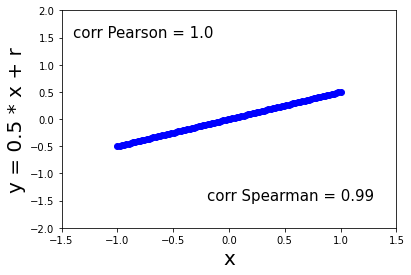

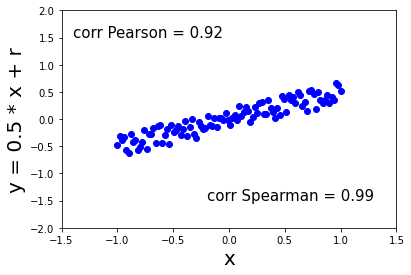

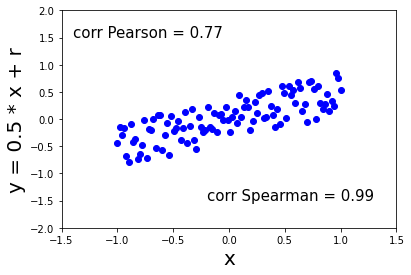

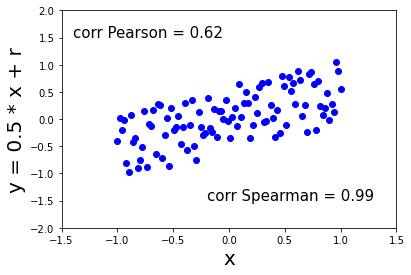

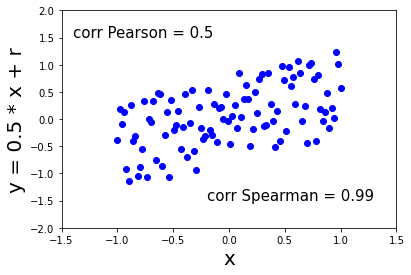

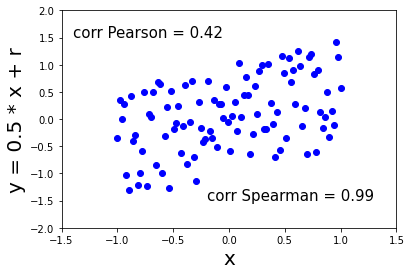

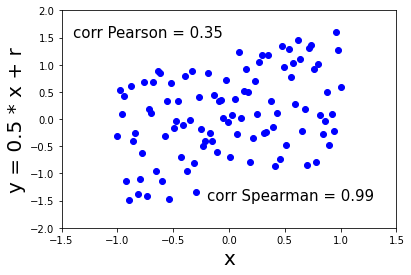

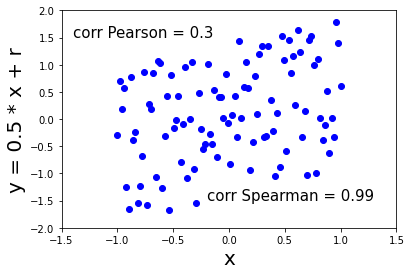

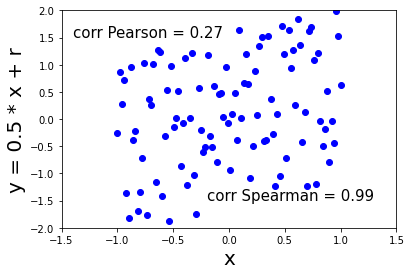

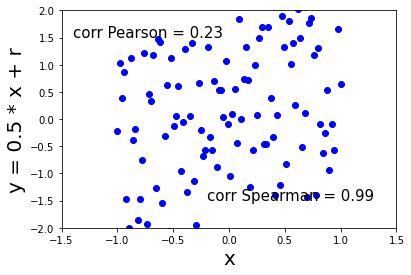

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

N = 100
X = np.linspace(-1,1, N) # Dados a serem criados em X
erro = np.random.uniform(-1,1,N) # ruído a ser incluído na relação linear.

for sigma in np.arange(0,2,0.2):
    Y = 0.5*X + erro*sigma # A equação para y que iremos usar
    plt.plot(X,Y, 'bo')
    corr, p_value = pearsonr(X, Y) # calcula a correlação de Pearson
    corrs, p_values = spearmanr(x, y) # calcula a correlação de Spearman

    corr = int(corr*100)/100
    corrs = int(corrs*100)/100

    stringPearson = 'corr Pearson = ' + str(corr)
    stringSpearman = 'corr Spearman = ' + str(corrs)

    plt.xlabel("x",fontsize = 20) 
    plt.ylabel("y = 0.5 * x + r", fontsize = 20) 
    plt.xlim(-1.5,1.5)
    plt.ylim(-2, 2)
    plt.text(-1.4,1.5, stringPearson, fontsize=15)
    plt.text(-0.2, -1.5, stringSpearman, fontsize=15)
    plt.show(True)